In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
words[:4]

['emma', 'olivia', 'ava', 'isabella']

In [12]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s, i in stoi.items()}

In [13]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [15]:
block_size=3
X,Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context),'-->',itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... --> e
..e --> m
.em --> m
emm --> a
mma --> .
olivia
... --> o
..o --> l
.ol --> i
oli --> v
liv --> i
ivi --> a
via --> .
ava
... --> a
..a --> v
.av --> a
ava --> .
isabella
... --> i
..i --> s
.is --> a
isa --> b
sab --> e
abe --> l
bel --> l
ell --> a
lla --> .
sophia
... --> s
..s --> o
.so --> p
sop --> h
oph --> i
phi --> a
hia --> .


In [16]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [43]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [17]:
C = torch.rand((27,2))

In [18]:
C

tensor([[0.0828, 0.2811],
        [0.6143, 0.8103],
        [0.5830, 0.3948],
        [0.8067, 0.6890],
        [0.7784, 0.7802],
        [0.2997, 0.4951],
        [0.7415, 0.8948],
        [0.3818, 0.7391],
        [0.6040, 0.8412],
        [0.4188, 0.2149],
        [0.2080, 0.4655],
        [0.4947, 0.4265],
        [0.4509, 0.7816],
        [0.7764, 0.7878],
        [0.6248, 0.6343],
        [0.3182, 0.7469],
        [0.2615, 0.3442],
        [0.4283, 0.6727],
        [0.2979, 0.3277],
        [0.8843, 0.3301],
        [0.2517, 0.4245],
        [0.3746, 0.4936],
        [0.8736, 0.3101],
        [0.0216, 0.3524],
        [0.5333, 0.8652],
        [0.8038, 0.5877],
        [0.2602, 0.4656]])

In [19]:
C[5]

tensor([0.2997, 0.4951])

In [23]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([0.2997, 0.4951])

In [66]:
temp1 = torch.rand((4,2))
temp2 = torch.randint(1,4,(3,2))


In [67]:
temp1,temp2

(tensor([[0.5879, 0.5672],
         [0.6512, 0.7281],
         [0.2211, 0.3146],
         [0.0818, 0.0893]]),
 tensor([[3, 3],
         [2, 3],
         [2, 2]]))

In [71]:
temp_emb = temp1[temp2]

In [73]:
temp_emb

tensor([[[0.0818, 0.0893],
         [0.0818, 0.0893]],

        [[0.2211, 0.3146],
         [0.0818, 0.0893]],

        [[0.2211, 0.3146],
         [0.2211, 0.3146]]])

In [ ]:
temp_emb[:,0,:],temp_emb[:,1,:]

(tensor([[0.0818, 0.0893],
         [0.2211, 0.3146],
         [0.2211, 0.3146]]),
 tensor([[0.0818, 0.0893],
         [0.0818, 0.0893],
         [0.2211, 0.3146]]))

In [24]:
C[X].shape

torch.Size([32, 3, 2])

In [60]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [25]:
X[13,2]

tensor(1)

In [26]:
C[1]

tensor([0.6143, 0.8103])

In [27]:
C[X][13,2]

tensor([0.6143, 0.8103])

In [36]:
W1 = torch.rand(6,100)
b1 = torch.rand(100)

In [37]:
enc @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (6x100 and 6x100)

In [64]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], dim=1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb,1),1).shape #Creates new memory so not efficient

torch.Size([32, 6])

In [65]:
emb[:,0,:],emb[:,1,:],emb[:,2,:]

(tensor([[0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.2997, 0.4951],
         [0.7764, 0.7878],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.3182, 0.7469],
         [0.4509, 0.7816],
         [0.4188, 0.2149],
         [0.8736, 0.3101],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.6143, 0.8103],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.4188, 0.2149],
         [0.8843, 0.3301],
         [0.6143, 0.8103],
         [0.5830, 0.3948],
         [0.2997, 0.4951],
         [0.4509, 0.7816],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.8843, 0.3301],
         [0.3182, 0.7469],
         [0.2615, 0.3442],
         [0.6040, 0.8412]]),
 tensor([[0.0828, 0.2811],
         [0.0828, 0.2811],
         [0.2997, 0.4951],
         [0.7764, 0.7878],
         [0.7764, 0.7878],

In [80]:
h = torch.tanh(emb.view(-1,6)@ W1 + b1)

In [81]:
W2 = torch.rand((100,27))
b2 = torch.rand(27)

In [82]:
logits = h @ W2 + b2

In [83]:
logits.shape

torch.Size([32, 27])

In [86]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [88]:
probs.shape

torch.Size([32, 27])

In [91]:
loss = -probs[torch.arange(32),Y].log().mean()

In [92]:
loss

tensor(5.6745)

In [93]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100,27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2,b2]

In [94]:
sum(p.nelement() for p in parameters)

3481

In [97]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@W1+b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1,keepdim=True)
# loss = -prob[torch.arange(32),Y].log().mean()
loss = F.cross_entropy(logits,Y)
loss

tensor(4.5415)

In [99]:
for p in parameters:
    p.requires_grad = True

In [108]:
for _ in range(100):
    emb = C[X]
    h = torch.tanh(emb.view(-1,6)@W1+b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())

    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

0.2967534065246582
0.29653382301330566
0.2963161766529083
0.29610034823417664
0.2958863377571106
0.29567429423332214
0.2954639494419098
0.2952554225921631
0.29504862427711487
0.2948436439037323
0.29464033246040344
0.2944387197494507
0.2942388355731964
0.29404059052467346
0.29384398460388184
0.29364898800849915
0.29345566034317017
0.29326385259628296
0.2930736243724823
0.2928849756717682
0.2926979064941406
0.29251232743263245
0.2923281788825989
0.2921455204486847
0.29196444153785706
0.2917846739292145
0.2916063964366913
0.2914295494556427
0.2912541329860687
0.29107996821403503
0.2909073233604431
0.29073596000671387
0.2905659079551697
0.2903972268104553
0.29022979736328125
0.290063738822937
0.28989896178245544
0.2897353768348694
0.2895731031894684
0.28941208124160767
0.28925228118896484
0.28909361362457275
0.28893613815307617
0.28877997398376465
0.2886248826980591
0.2884710431098938
0.2883182764053345
0.2881666421890259
0.2880162000656128
0.2878668010234833
0.2877185046672821
0.287571370

In [109]:
block_size = 3
X, Y = [],[]
for w in words:
    context = [0]*block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [112]:
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
def build_dataset(words):
    block_size = 3
    X, Y = [],[]

In [134]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100,27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2,b2]

In [135]:
for p in parameters:
    p.requires_grad = True

In [136]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [149]:
lri = []
lossi = []
for i in range(10000):
    ix = torch.randint(0,X.shape[0], (32,))

    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)@W1+b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())

    for p in parameters:
        p.grad = None
    loss.backward()
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    # lossi.append(loss.item())

2.443887233734131
2.5333378314971924
2.199646472930908
2.6782100200653076
2.3244447708129883
2.319443702697754
2.8027079105377197
2.428898811340332
2.0894534587860107
2.7190024852752686
2.143641948699951
2.505359411239624
2.294965982437134
2.4753713607788086
2.4248015880584717
2.47218656539917
2.673736095428467
2.2755095958709717
2.2033369541168213
2.3548622131347656
2.226475477218628
2.17033314704895
2.3285982608795166
1.985839605331421
2.0572781562805176
1.8906830549240112
1.9984664916992188
2.2039453983306885
2.4991016387939453
2.5189554691314697
2.1063661575317383
2.314791202545166
2.373462438583374
2.0714659690856934
2.240370512008667
2.3240296840667725
2.440495491027832
2.4628334045410156
2.60079026222229
2.5031309127807617
2.244884729385376
2.2111618518829346
2.413007974624634
2.431452512741089
2.266364336013794
2.0773942470550537
2.4586637020111084
2.103123903274536
2.4945576190948486
2.272645950317383
2.404301404953003
2.3709423542022705
2.1973180770874023
2.3604800701141357
2

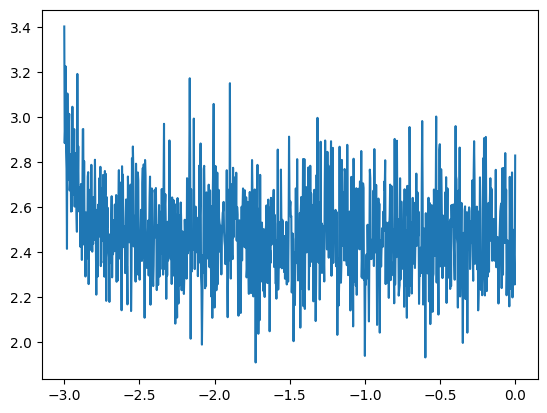

In [144]:
plt.plot(lri,lossi)

In [150]:
for _ in range(20):
    out =[]
    context = [0]* block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1)@ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))

sraish.
loilena.
alein.
tiriosa.
brcenesiya.
jaungtoir.
rah.
aaruilan.
kasanipherm.
ozrynoturma.
vayna.
hina.
aader.
kan.
ayvoni.
serrance.
jacuolairahinanelxhavia.
kame.
hamelryn.
leir.
